In [5]:
from os import listdir
listdir()


['.ipynb_checkpoints',
 'Microbiome_Analysis_Pandas_Example_In_Class.ipynb',
 'scenario1_otus_pandas.txt']

In [12]:
import pandas as pd
#Loading the text csv file as pandas
feature_table = pd.read_csv("scenario1_otus_pandas.txt",sep="\t")
print(feature_table)

  OTU_ID  patient1  patient2  patient3  patient4  patient5  patient6  \
0   OTU1         3         4         2         2         0         4   
1   OTU2         4         1         3         4         1         3   
2   OTU3         1         4         2         1         4         2   
3   OTU4         2         3         0         1         2         0   
4   OTU5         0         0         0         0         0         0   

   patient7  patient8  patient9  patient10  patient11  patient12  
0         4         4         0          3          2          2  
1         3         3         4          1          1          4  
2         2         2         1          4          4          1  
3         1         2         3          0          2          1  
4         1         4         2          2          3          4  


In [17]:
from IPython.display import HTML
feature_table = feature_table.set_index('OTU_ID')
HTML(feature_table.to_html())

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


In [21]:
col = feature_table['patient6']
type(col)
col

OTU_ID
OTU1    4
OTU2    3
OTU3    2
OTU4    0
OTU5    0
Name: patient6, dtype: int64

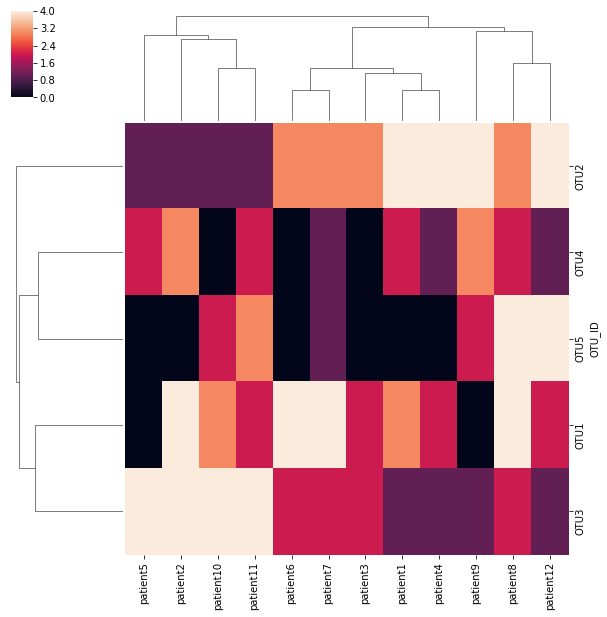

In [23]:
%matplotlib inline
from seaborn import clustermap
clustermap(feature_table)

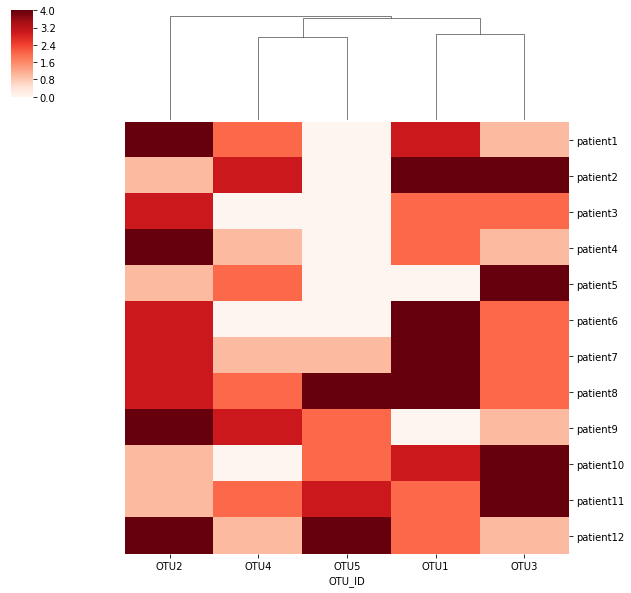

In [34]:
feature_table_transposed = feature_table.transpose()
clustermap(feature_table_transposed, row_cluster=False,col_cluster=True,cmap='Reds')

In [35]:
#Recall that : means all, and we specify rows,columns when using .loc
print("Select all of the OTU1 column:")
selected_column = feature_table_transposed.loc[:,'OTU1']
print(selected_column)

Select all of the OTU1 column:
patient1     3
patient2     4
patient3     2
patient4     2
patient5     0
patient6     4
patient7     4
patient8     4
patient9     0
patient10    3
patient11    2
patient12    2
Name: OTU1, dtype: int64


In [39]:
feature_table_transposed.loc['patient6','OTU3']

2

In [40]:
#First look up the names of all the samples (so all the column names)
print(feature_table_transposed.columns.values)

['OTU1' 'OTU2' 'OTU3' 'OTU4' 'OTU5']


In [42]:
#First look up the names of all the samples (so all the column names)
print(feature_table_transposed.index.values)

['patient1' 'patient2' 'patient3' 'patient4' 'patient5' 'patient6'
 'patient7' 'patient8' 'patient9' 'patient10' 'patient11' 'patient12']


In [47]:
data = feature_table_transposed.loc['patient6',:]
type(data)
data_as_list = list(data)
print(data_as_list)

[4, 3, 2, 0, 0]


## Task: Calculate Alpha Diversity for Each Sample in the Table

In [49]:
feature_table

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


In [63]:

def calc_alpha_diversities(feature_table):
    """Return a dict of alpha diversities given a feature table
    
    feature_table -- a Pandas DataFrame with species on the rows, 
      samples on the columns and counts in each cell
    """

    alpha_diversities = {} #keys are samples / patients, values are alpha-diversities

    for col in feature_table.columns.values:
        species_count = 0

        for row in feature_table.index.values:
            data_value = feature_table.loc[row,col]
            if data_value > 0:
                species_count += 1
                
        alpha_diversities[col] = species_count
        
    return alpha_diversities



adivs = calc_alpha_diversities(feature_table)
print("Alpha diversities:",adivs)

Alpha diversities: {'patient1': 4, 'patient2': 4, 'patient3': 3, 'patient4': 4, 'patient5': 3, 'patient6': 3, 'patient7': 5, 'patient8': 5, 'patient9': 4, 'patient10': 4, 'patient11': 5, 'patient12': 5}


In [ ]:
# Iterate over columns
# Count non-zero rows
for col in feature_table.columns.values:
    print("Currrent col", col)
    species_count = 0
    for row in feature_table.index.values:
        data_value = feature_table.loc[row,col]
        if data_value > 0:
            species_count += 1
    print("Alpha_diversity:", species_count)
        